<p style="font-size: 40px; color: #ffffff; font-family: 'Montserrat'; text-align: center; background-color: #14213d; border-radius: 10px 10px; padding: 20px; margin: 10px 0;">
  <strong>Análisis de terremotos en Chile (2000-2024)</strong>
</p>


<div align="center">
  <img src="https://cdn-icons-png.flaticon.com/512/7190/7190566.png" style="border-radius:2px; width:250px;">
</div>



<h5 style="text-align: center; font-family: Georgia; font-size: 15px; font-style: normal; font-weight: bold; text-decoration: None; text-transform: none; letter-spacing: 1px; color: black; background-color: #ffffff;">Created by: Diego Isaac Riquelme Ramírez</h5>

<a id="top"></a>

# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#14213d;overflow:hidden; border-left: 10px solid #fca311;">Tabla de contenidos</div>

<div class="list-group" id="list-tab" role="tablist">
    
* [A. Introducción](#0)

* [B. Preparación](#1)
    - [1. Importar librerías](#1.1)
    - [2. Importar dataset y colorset](#1.2)

* [C. Limpieza](#2)
    - [1. Verificar NA y Duplicados](#2.1)
    - [2. Corregir nombres de headers y datos](#2.2)

* [D. Análisis estadístico](#3)
    - [1. Describe](#3.1)
    - [2. Correlación de Pearson](#3.2)

* [E. Exploratory Data Analysis](#4)
    - [1. EDA de las variables numéricas del dataset](#4.1)
    - [2. Distribución de la magnitud](#4.2)
    - [3. Distribución de la profundidad](#4.3)
    - [4. Análisis temporal - Frecuencia de terremotos por año](#4.4)
    - [5. Análisis temporal - Promedio de magnitud y profundidad por año](#4.5)
    - [6. Definición de cuartiles basados en profundidad y análisis geográfico](#4.6)
    - [7. Relación entre magnitud y profundidad, basado en los cuartiles](#4.7)
    - [8. Relación entre magnitud y profundidad](#4.8)

* [F. Conclusiones](#5)



<a id="0"></a>

# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#14213d;overflow:hidden; border-left: 10px solid #fca311;">A. Introducción</div>

<span style="font-size:18px; font-family:Roboto;color:#ac0018"><strong> Contexto</strong> </span>
    
<ul style="list-style-type:circle;">
    <span style='font-size:18px; font-family:Roboto;'>Chile es un país altamente sísmico debido a su ubicación en el Cinturón de Fuego del Pacífico, una región con alta actividad tectónica y sísmica. Esto significa que Chile experimenta una gran cantidad de terremotos y eventos sísmicos a lo largo de los años.</span>
</ul>

<span style="font-size:18px; font-family:Roboto;color:#ac0018"><strong> Acerca del Dataset</strong> </span>
    
<ul style="list-style-type:circle;">
    <span style='font-size:18px; font-family:Roboto;'>El dataset contiene información sobre terremotos, incluyendo profundidad, magnitud, fecha y ubicación de los eventos sísmicos. Cubre el periodo desde 2000 hasta 2024. Este dataset contiene magnitudes que van desde los 1 grados hasta el 8.8 ocurrido el año 2010. Las columnas clave son:
    <ul style="list-style-type:square;">
        <li><strong>'UTC Date':</strong> La fecha y hora del terremoto.</li>
        <li><strong>'Profundity (km)':</strong> La profundidad del terremoto en kilómetros.</li>
        <li><strong>'Magnitude':</strong> La magnitud del terremoto.</li>
        <li><strong>'Location':</strong> La ubicación o región afectada.</li>
        <li><strong>'Latitude' y 'Longitude':</strong> Coordenadas geográficas del terremoto.</li>
        <li><strong>'Year':</strong> Año en que ocurrió el terremoto.</li>
    </ul>
    </span>
</ul>


<a id="1"></a>

# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Roboto;text-align:left;display:fill;border-radius:5px;background-color:#14213d;overflow:hidden; border-left: 10px solid #fca311;">B. Preparación</div>


<a id="1.1"></a>

## <div style= "font-family: Roboto; font-weight:bold; letter-spacing: 0px; color: black; font-size: 60%; text-align:left;padding:4.0px; background-color:aliceblue; padding:20px; border-bottom: 3px solid #14213d;"> 1. Importar librerías</div>

In [1]:
# Librerías para manipulación y análisis de datos
import pandas as pd
#import numpy as np

# Librerías para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
#import plotly.io as pio

# Warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

<a id="1.2"></a>

## <div style= "font-family: Roboto; font-weight:bold; letter-spacing: 0px; color: black; font-size: 60%; text-align:left;padding:4.0px; background-color:aliceblue; padding:20px; border-bottom: 3px solid #14213d;"> 2. Importar dataset y colorset</div>

In [2]:
df = pd.read_csv('EarthquakesChile_2000-2024.csv')

In [3]:
color_set = ['#316395', '#b82e2e', '#008695', '#5f4690', '#94346e', '#cc513e']

In [4]:
df.sample(10)

,UTC Date,Profoundity,Magnitude,Date,Hour,Location,Latitude,Longitude
75012,2013-11-30 11:37:19,54 km,3.3 Ml,2013-11-30,08:37:19,23 km al O de Punitaqui,-30.884,-71.489
40351,2018-10-11 10:00:15,248 km,3.0 Ml,2018-10-11,07:00:15,111 km al E de Socaire,-23.189,-66.896
45292,2018-01-28 09:02:20,92 km,2.6 Ml,2018-01-28,06:02:20,27 km al N de Calama,-22.229,-68.917
88404,2011-05-28 21:03:26,95 km,3.4 Ml,2011-05-28,17:03:26,53 km al N de Pica,-20.039,-69.178
27423,2020-06-27 07:57:30,112 km,3.9 Ml,2020-06-27,03:57:30,31 km al O de Termas del Flaco,-34.834,-70.739
56968,2016-08-22 07:33:43,127 km,3.5 Ml,2016-08-22,04:33:43,71 km al SO de OllagÃ¼e,-21.697,-68.721
98313,2009-12-26 19:03:11,28 km,1.7 Ml,2009-12-26,16:03:11,17 km al N de Farellones,-33.202,-70.352
65296,2015-07-06 02:05:47,17 km,3.8 Ml,2015-07-05,23:05:47,56 km al O de ConcepciÃ³n,-36.648,-73.637
11369,2022-07-19 06:58:10,125 km,2.7 Ml,2022-07-19,02:58:10,12 km al NE de San Pedro de Atacama,-22.819,-68.150
48968,2017-08-13 07:35:08,31 km,3.1 Ml,2017-08-13,04:35:08,31 km al O de Canela Baja,-31.420,-71.784


<a id="2"></a>

# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Roboto;text-align:left;display:fill;border-radius:5px;background-color:#14213d;overflow:hidden; border-left: 10px solid #fca311;">C. Limpieza</div>


<a id="2.1"></a>

## <div style= "font-family: Roboto; font-weight:bold; letter-spacing: 0px; color: black; font-size: 60%; text-align:left;padding:4.0px; background-color:aliceblue; padding:20px; border-bottom: 3px solid #14213d;"> 1. Verificar NA y Duplicados</div>

In [5]:
na = df.isna().sum()
duplicateds = df.duplicated().sum()
print('Datos NA:')
print(na)

print('\nDatos duplicados:')
print(duplicateds)

df = df.dropna().reset_index(drop=True)
df = df.drop_duplicates().reset_index(drop=True)

Datos NA:
UTC Date         0
Profoundity    472
Magnitude      472
Date           472
Hour           472
Location       472
Latitude       472
Longitude      472
dtype: int64

Datos duplicados:
3


<a id="2.2"></a>

## <div style= "font-family: Roboto; font-weight:bold; letter-spacing: 0px; color: black; font-size: 60%; text-align:left;padding:4.0px; background-color:aliceblue; padding:20px; border-bottom: 3px solid #14213d;"> 2. Corregir nombres de headers y datos</div>

In [6]:
df = df.rename(columns={'Profoundity': 'Profundity (km)'})
df['Profundity (km)'] = df['Profundity (km)'].str.replace(' km', '').astype(int)

In [7]:
#import re
#df['Unit'] = df['Magnitude'].apply(lambda x: re.sub(r'\d+(\.\d+)?\s*', '', x))

# Obtener valores únicos
#df['Unit'].unique()

In [8]:
units_to_remove = ['Ml', 'Mw', 'Mww', 'Mb', 'Mlv', 'M', 'Ms', 'Mc', 'w', 'c', 'v', 's']
for unit in units_to_remove:
    df['Magnitude'] = df['Magnitude'].str.replace(f' {unit}', '', regex=False)
    df['Magnitude'] = df['Magnitude'].str.replace(unit, '', regex=False)
df['Magnitude'] = pd.to_numeric(df['Magnitude'])

<a id="3"></a>

# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Roboto;text-align:left;display:fill;border-radius:5px;background-color:#14213d;overflow:hidden; border-left: 10px solid #fca311;">D. Análisis estadístico</div>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133587 entries, 0 to 133586
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   UTC Date         133587 non-null  object 
 1   Profundity (km)  133587 non-null  int32  
 2   Magnitude        133587 non-null  float64
 3   Date             133587 non-null  object 
 4   Hour             133587 non-null  object 
 5   Location         133587 non-null  object 
 6   Latitude         133587 non-null  float64
 7   Longitude        133587 non-null  float64
dtypes: float64(3), int32(1), object(4)
memory usage: 7.6+ MB


<a id="3.1"></a>

## <div style= "font-family: Roboto; font-weight:bold; letter-spacing: 0px; color: black; font-size: 60%; text-align:left;padding:4.0px; background-color:aliceblue; padding:20px; border-bottom: 3px solid #14213d;"> 1. Describe</div>

In [10]:
# DataFrame para variables numéricas
numeric_df = pd.DataFrame()
numeric_df['Dtype'] = df.select_dtypes(include=['number']).dtypes
numeric_df['Nulls'] = df.select_dtypes(include=['number']).isna().sum()
numeric_df['Nulls%'] = df.select_dtypes(include=['number']).isna().mean() * 100
numeric_df['Unique Count'] = df.select_dtypes(include=['number']).nunique()
numeric_df['Mode'] = df.select_dtypes(include=['number']).mode().iloc[0]
numeric_df['Min'] = df.select_dtypes(include=['number']).min()
numeric_df['25%'] = df.select_dtypes(include=['number']).quantile(0.25)
numeric_df['Median'] = df.select_dtypes(include=['number']).median()
numeric_df['75%'] = df.select_dtypes(include=['number']).quantile(0.75)
numeric_df['Max'] = df.select_dtypes(include=['number']).max()
numeric_df['Mean'] = df.select_dtypes(include=['number']).mean()
numeric_df['Std'] = df.select_dtypes(include=['number']).std()
numeric_df['IQR'] = df.select_dtypes(include=['number']).quantile(0.75) - df.select_dtypes(include=['number']).quantile(0.25)

# DataFrame para variables no numéricas
non_numeric_df = pd.DataFrame()
non_numeric_df['Dtype'] = df.select_dtypes(exclude=['number']).dtypes
non_numeric_df['Nulls'] = df.select_dtypes(exclude=['number']).isna().sum()
non_numeric_df['Nulls%'] = df.select_dtypes(exclude=['number']).isna().mean() * 100
non_numeric_df['Unique Count'] = df.select_dtypes(exclude=['number']).nunique()

# Información del DataFrame:
num_rows, num_cols = df.shape
print(f"Número de filas: {num_rows}")
print(f"Número de columnas: {num_cols}")

print("\nAnálisis inicial de variables numéricas:")
display(numeric_df)

print("\nAnálisis inicial de variables no numéricas:")
display(non_numeric_df)

Número de filas: 133587
Número de columnas: 8

Análisis inicial de variables numéricas:


,Dtype,Nulls,Nulls%,Unique Count,Mode,Min,25%,Median,75%,Max,Mean,Std,IQR
Profundity (km),int32,0,0.0,391,15.000,0.000,30.000,56.000,112.000,676.000,77.192983,61.155311,82.000
Magnitude,float64,0,0.0,71,2.900,1.000,2.800,3.100,3.600,8.800,3.251783,0.678380,0.800
Latitude,float64,0,0.0,22119,-33.142,-65.399,-33.048,-29.742,-21.997,58.692,-28.025420,6.729367,11.051
Longitude,float64,0,0.0,9287,-71.713,-179.989,-71.698,-70.527,-69.013,179.647,-69.921784,10.647500,2.685



Análisis inicial de variables no numéricas:


,Dtype,Nulls,Nulls%,Unique Count
UTC Date,object,0,0.0,133474
Date,object,0,0.0,8771
Hour,object,0,0.0,68078
Location,object,0,0.0,28965


<a id="3.2"></a>

## <div style= "font-family: Roboto; font-weight:bold; letter-spacing: 0px; color: black; font-size: 60%; text-align:left;padding:4.0px; background-color:aliceblue; padding:20px; border-bottom: 3px solid #14213d;"> 2. Correlación de Pearson</div>

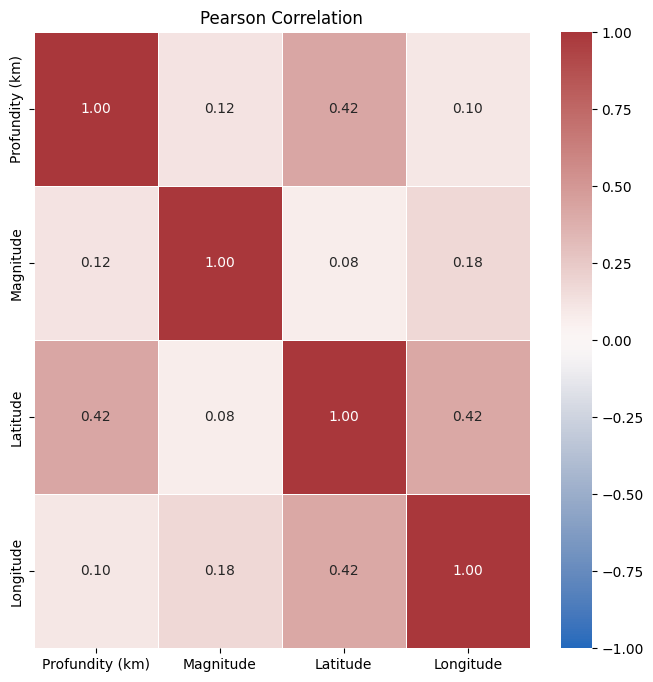

In [11]:
plt.figure(figsize=(8, 8), facecolor='white')
sns.heatmap(
    data=df.corr(numeric_only=True),
    cmap='vlag',
    vmin=-1, vmax=1,
    linecolor='white', linewidth=0.5,
    annot=True,
    fmt='.2f'
)
plt.title('Pearson Correlation')
plt.show()

<a id="4"></a>

# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Roboto;text-align:left;display:fill;border-radius:5px;background-color:#14213d;overflow:hidden; border-left: 10px solid #fca311;">E. Exploratory Data Analysis</div>

<a id="4.1"></a>

## <div style= "font-family: Roboto; font-weight:bold; letter-spacing: 0px; color: black; font-size: 60%; text-align:left;padding:4.0px; background-color:aliceblue; padding:20px; border-bottom: 3px solid #14213d;"> 1. EDA de las variables numéricas del dataset</div>

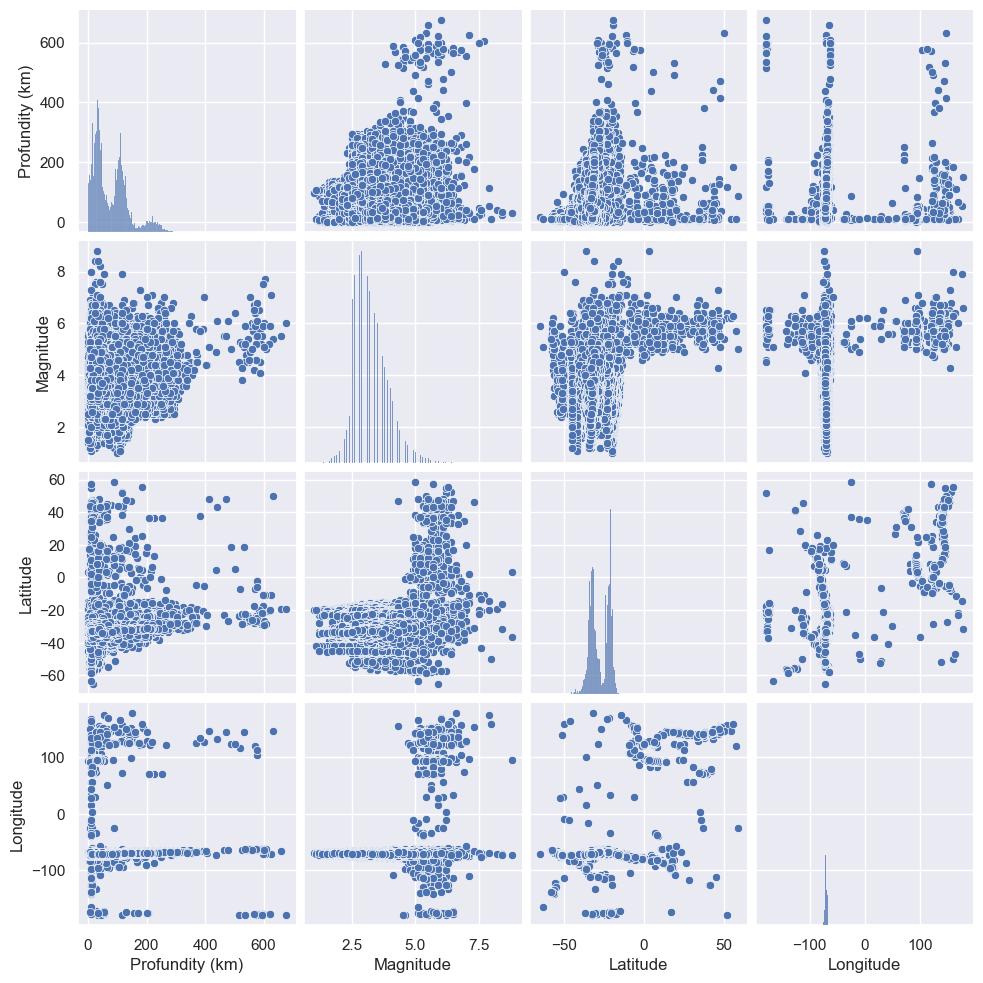

In [12]:
sns.set()
sns.pairplot(data=df)
plt.show()

<a id="4.2"></a>

## <div style= "font-family: Roboto; font-weight:bold; letter-spacing: 0px; color: black; font-size: 60%; text-align:left;padding:4.0px; background-color:aliceblue; padding:20px; border-bottom: 3px solid #14213d;"> 2. Distribución de la magnitud</div>

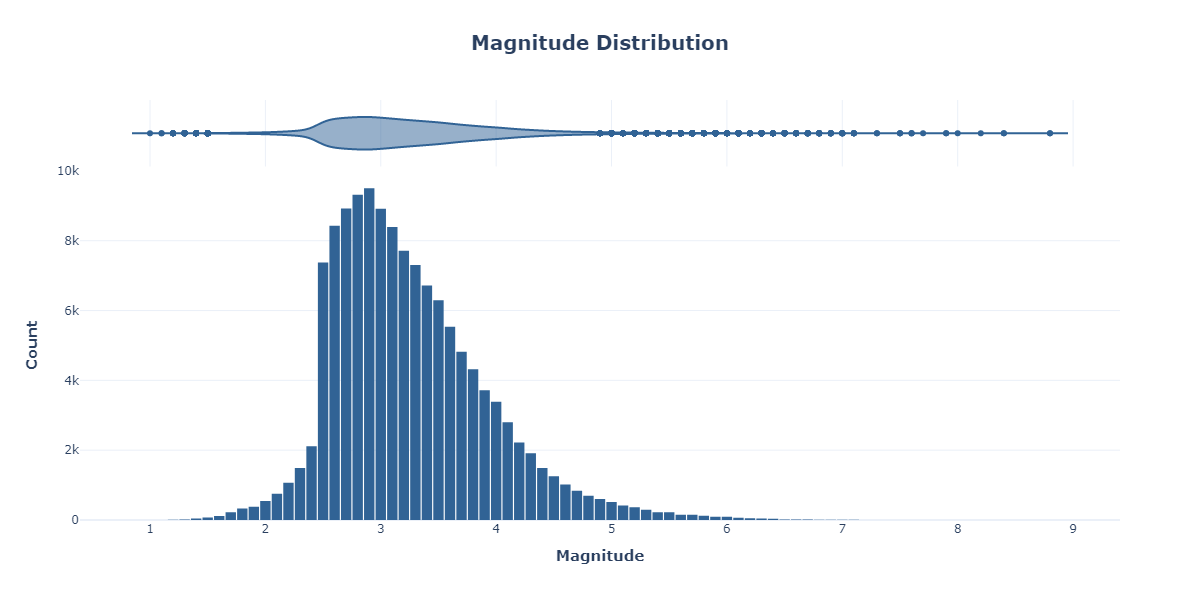

In [13]:
fig = px.histogram(data_frame=df, x='Magnitude', nbins=100, color_discrete_sequence=color_set, title='<b>Magnitude Distribution</b>',
                 height=600, width=1200,
                  marginal='violin',
)
fig.update_layout(bargap=0.1,
                  template="plotly_white",
                  xaxis_title='<b>Magnitude</b>',
                  yaxis_title='<b>Count</b>',
                  legend_title='',
                  title_font_size=20,
                  xaxis_title_font_size=15,
                  yaxis_title_font_size=15,
                  title_x=0.5,
)
fig.show(renderer="png")

<a id="4.3"></a>

## <div style="font-family: Roboto; font-weight:bold; letter-spacing: 0px; color: black; font-size: 60%; text-align:left;padding:4.0px; background-color:aliceblue; padding:20px; border-bottom: 3px solid #14213d;">3. Distribución de la profundidad</div>

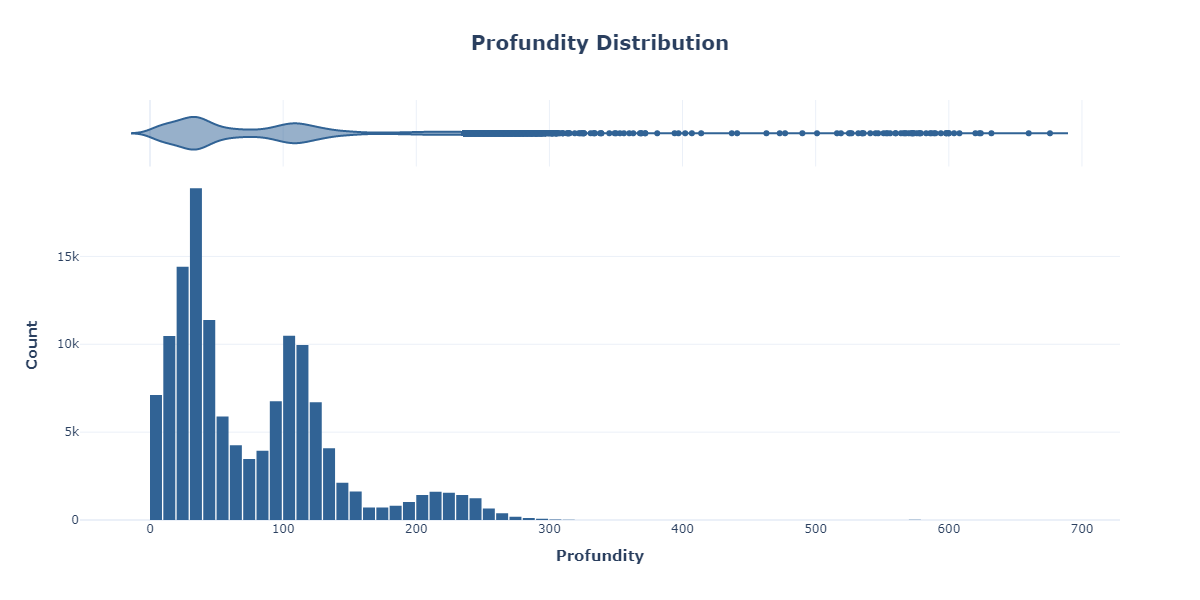

In [14]:
fig = px.histogram(data_frame=df, x='Profundity (km)', nbins=100, color_discrete_sequence=color_set, title='<b>Profundity Distribution</b>',
                 height=600, width=1200,
                  marginal='violin',
)
fig.update_layout(bargap=0.1,
                  template="plotly_white",
                  xaxis_title='<b>Profundity</b>',
                  yaxis_title='<b>Count</b>',
                  legend_title='',
                  title_font_size=20,
                  xaxis_title_font_size=15,
                  yaxis_title_font_size=15,
                  title_x=0.5,
)

fig.show(renderer="png")

<a id="4.4"></a>

## <div style="font-family: Roboto; font-weight:bold; letter-spacing: 0px; color: black; font-size: 60%; text-align:left;padding:4.0px; background-color:aliceblue; padding:20px; border-bottom: 3px solid #14213d;">4. Análisis temporal - Frecuencia de terremotos por año</div>


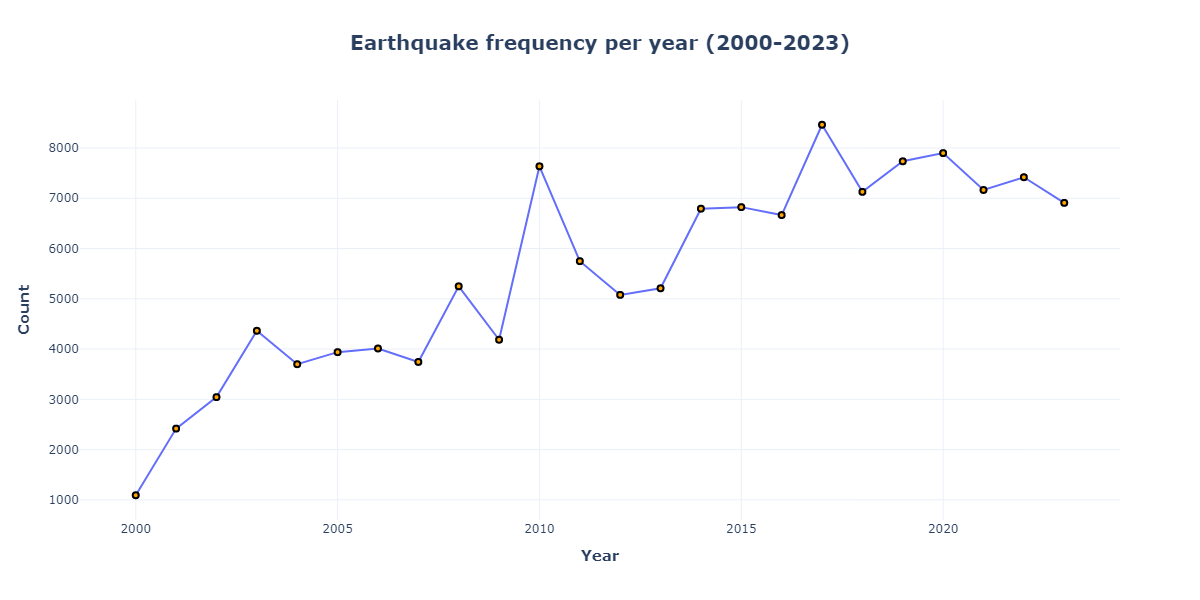

In [15]:
df['Date'] = pd.to_datetime(df['Date']) # Transform to datetime
df['Year'] = df['Date'].dt.year # Extract the year
earthquakes_by_year = df.groupby('Year').size().reset_index(name='Count')
earthquakes_by_year = earthquakes_by_year[earthquakes_by_year['Year'] != 2024] # 2024 doesn't have a lot of data

# Create a line plot using Plotly
fig = px.line(
    earthquakes_by_year.reset_index(), 
    height=600, width=1200, 
    x='Year',
    y='Count',
    markers=True,
    title='<b>Earthquake frequency per year (2000-2023)</b>',
)

# Update layout for better formatting
fig.update_layout(
    xaxis_title="<b>Year</b>",
    title_x=0.5,
    yaxis_title="<b>Count</b>",
    template="plotly_white",
    title_font_size=20,
    xaxis_title_font_size=15,
    yaxis_title_font_size=15
)

# Customize marker style
fig.update_traces(marker=dict(size=6, color='orange', line=dict(width=2, color='black')))

# Show the plot
fig.show(renderer="png")

<a id="4.5"></a>

## <div style="font-family: Roboto; font-weight:bold; letter-spacing: 0px; color: black; font-size: 60%; text-align:left;padding:4.0px; background-color:aliceblue; padding:20px; border-bottom: 3px solid #14213d;">5. Análisis temporal - Promedio de magnitud y profundidad por año</div>


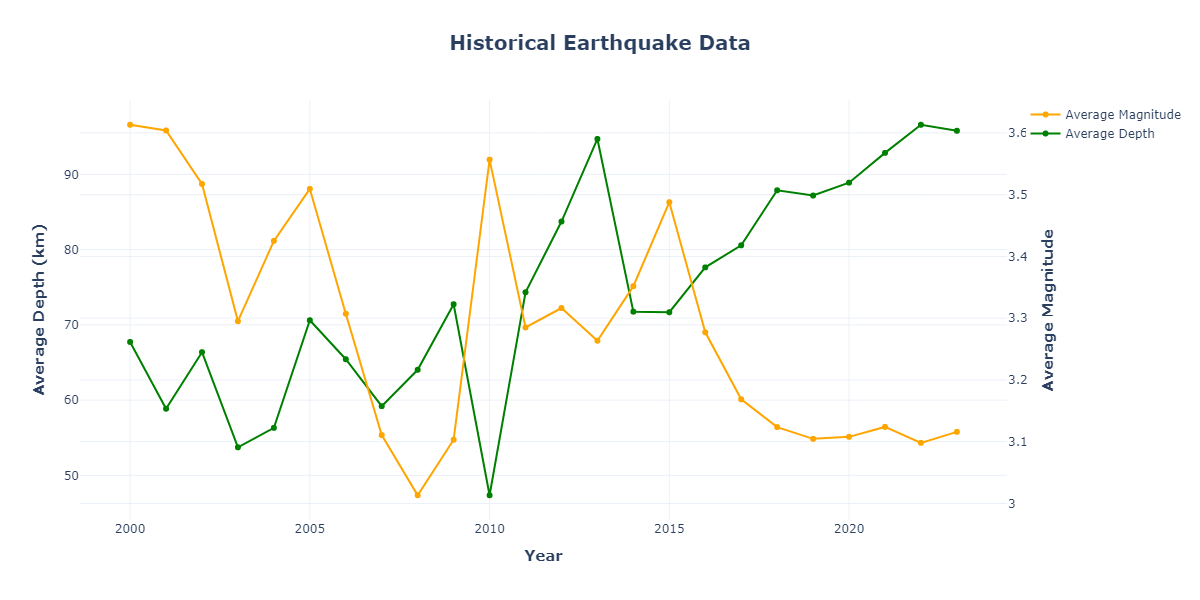

In [16]:
# Filter the data to exclude the year 2024
df_filtered = df[df['Year'] != 2024]

# Calculate the average magnitude and depth by year
magnitude_by_year = df_filtered.groupby('Year')['Magnitude'].mean().reset_index(name='Average Magnitude')
depth_by_year = df_filtered.groupby('Year')['Profundity (km)'].mean().reset_index(name='Average Depth')

# Create the figure (For duals )
fig = go.Figure()

# Add the average magnitude line 
fig.add_trace(go.Scatter(
    x=magnitude_by_year['Year'],
    y=magnitude_by_year['Average Magnitude'],
    mode='lines+markers',
    name='Average Magnitude',
    line=dict(color='orange'),
    marker=dict(size=6, color='orange'),
    yaxis='y2'
))

# Add the average depth line
fig.add_trace(go.Scatter(
    x=depth_by_year['Year'],
    y=depth_by_year['Average Depth'],
    mode='lines+markers',
    name='Average Depth',
    line=dict(color='green'),
    marker=dict(size=6, color='green')
))

# Update the layout of the plot
fig.update_layout(
    title='<b>Historical Earthquake Data</b>',
    xaxis_title='<b>Year</b>',
    yaxis=dict(
        title='<b>Average Depth (km)</b>',
        title_font_size=15
    ),
    yaxis2=dict(
        title='<b>Average Magnitude</b>',
        title_font_size=15,
        overlaying='y',
        side='right'
    ),
    template='plotly_white',
    title_x=0.5,
    title_font_size=20,
    xaxis_title_font_size=15,
    height=600, width=1200
)

# Show the plot
fig.show(renderer="png")

<a id="4.6"></a>

## <div style="font-family: Roboto; font-weight:bold; letter-spacing: 0px; color: black; font-size: 60%; text-align:left;padding:4.0px; background-color:aliceblue; padding:20px; border-bottom: 3px solid #14213d;">6. Definición de cuartiles basados en profundidad y análisis geográfico</div>


In [17]:
# Calcula los cuartiles para la columna 'Profundity (km)'
quartiles = df['Profundity (km)'].quantile([0.25, 0.5, 0.75])
q1, q2, q3 = quartiles[0.25], quartiles[0.5], quartiles[0.75]

# Asignar grupos basados en los cuartiles
df['Profundity Group'] = pd.cut(df['Profundity (km)'], bins=[-float('inf'), q1, q2, q3, float('inf')],
                                labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Mostrar los cuartiles y el cuarto cuartil
print(f"Quartiles:")
print(f"Q1 (25th percentile): {q1}")
print(f"Q2 (50th percentile / Median): {q2}")
print(f"Q3 (75th percentile): {q3}")

print()
# Calcular el valor máximo
q4 = df['Profundity (km)'].max()
print(f"Q4 (100th percentile / Max): {q4}")

count_by_quartile = df['Profundity Group'].value_counts().sort_index()
print(f"Count by quartile: {count_by_quartile}")

Quartiles:
Q1 (25th percentile): 30.0
Q2 (50th percentile / Median): 56.0
Q3 (75th percentile): 112.0

Q4 (100th percentile / Max): 676
Count by quartile: Profundity Group
Q1    34101
Q2    32712
Q3    33709
Q4    33065
Name: count, dtype: int64


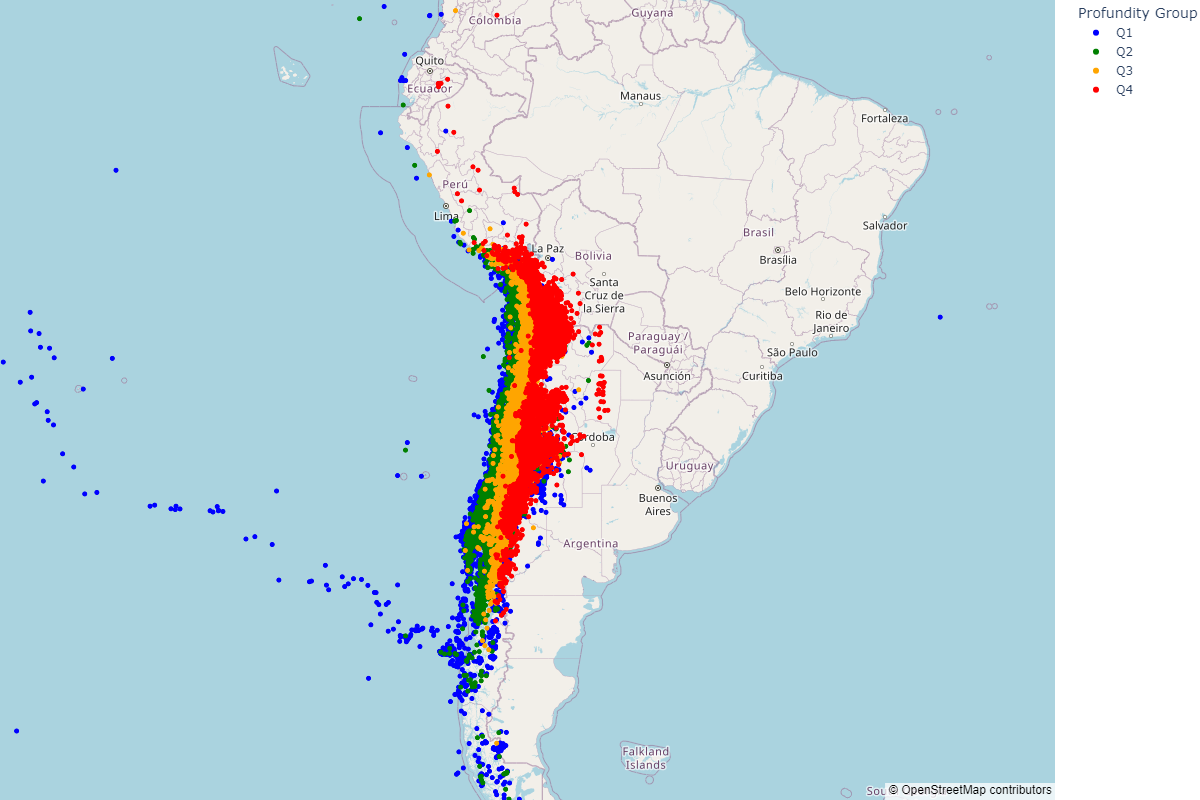

In [18]:
fig = px.scatter_mapbox(
    df,
    lat='Latitude',
    lon='Longitude',
    color='Profundity Group',
    color_discrete_map={'Q1': 'blue', 'Q2': 'green', 'Q3': 'orange', 'Q4': 'red'},
    category_orders={'Profundity Group': ['Q1', 'Q2', 'Q3', 'Q4']},
    mapbox_style='open-street-map',
    height=800,
    width=1200,
    zoom=3
)

fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
#fig.show()
fig.show(renderer="png")

<a id="4.7"></a>

## <div style="font-family: Roboto; font-weight:bold; letter-spacing: 0px; color: black; font-size: 60%; text-align:left;padding:4.0px; background-color:aliceblue; padding:20px; border-bottom: 3px solid #14213d;">7. Relación entre magnitud y profundidad, basado en los cuartiles</div>


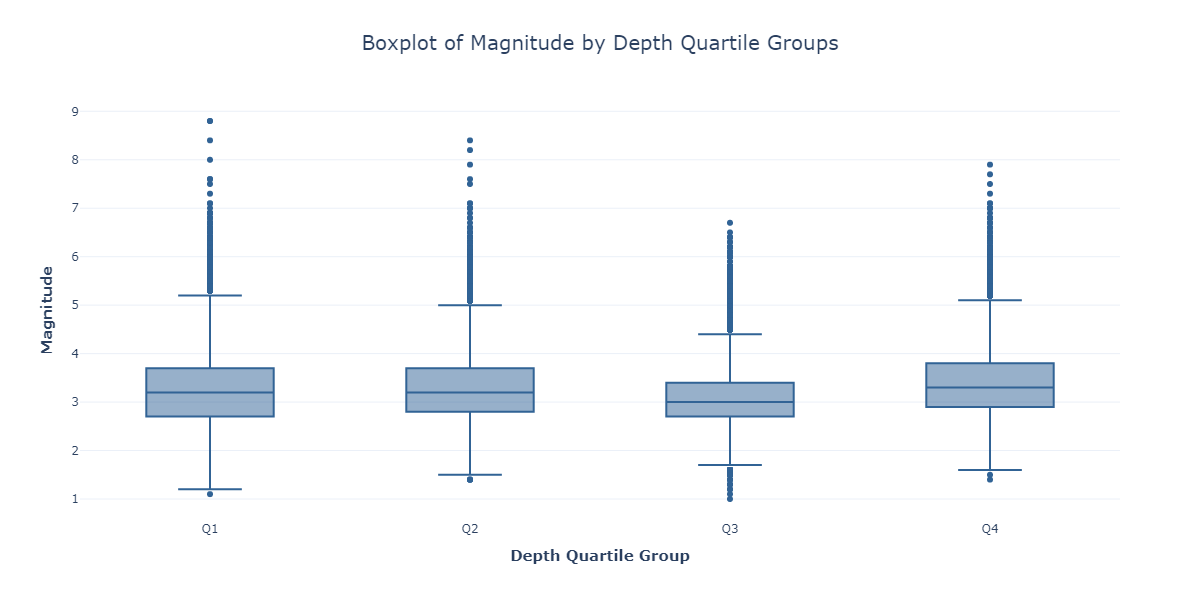

In [19]:
# Crear un boxplot de Magnitude por grupo de Profundidad
fig = px.box(df, x='Profundity Group', y='Magnitude', 
             color_discrete_sequence=color_set,
             title='Boxplot of Magnitude by Depth Quartile Groups',
             height=600, width=1200)

fig.update_layout(
    xaxis_title="<b>Depth Quartile Group</b>",
    title_x=0.5,
    yaxis_title="<b>Magnitude</b>",
    template="plotly_white",
    title_font_size=20,
    xaxis_title_font_size=15,
    yaxis_title_font_size=15
)
fig.update_xaxes(categoryorder='array', categoryarray=['Q1', 'Q2', 'Q3', 'Q4'])
fig.show(renderer="png")

<a id="4.8"></a>

## <div style="font-family: Roboto; font-weight:bold; letter-spacing: 0px; color: black; font-size: 60%; text-align:left;padding:4.0px; background-color:aliceblue; padding:20px; border-bottom: 3px solid #14213d;">8. Relación entre magnitud y profundidad</div>

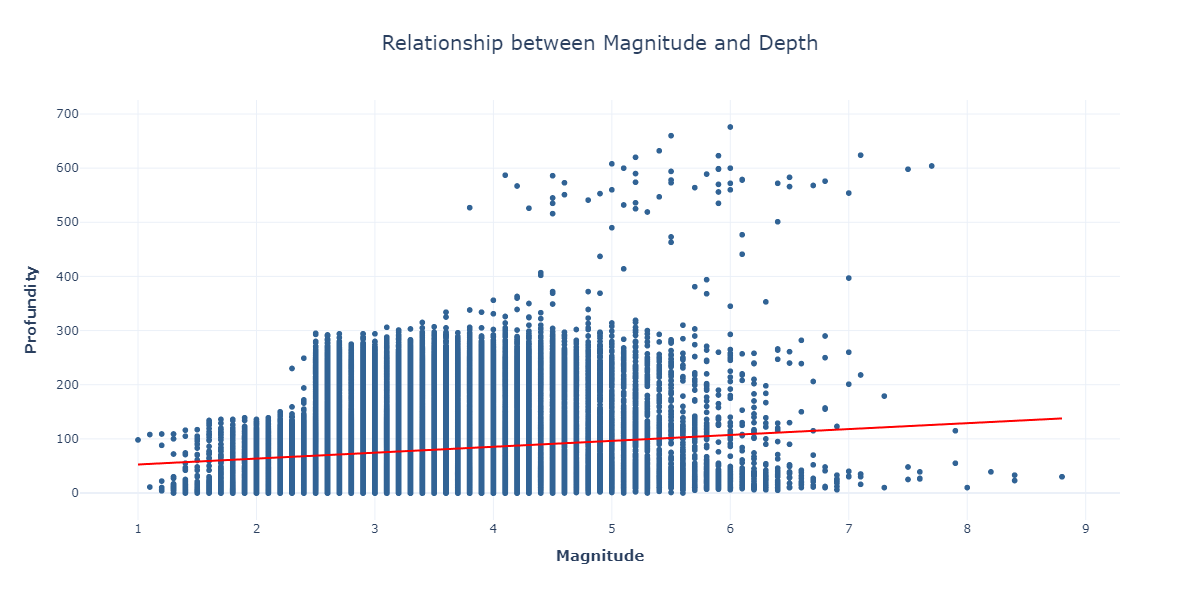

In [20]:
fig = px.scatter(data_frame=df, x='Magnitude', y='Profundity (km)', 
                 color_discrete_sequence=color_set, 
                 title='Relationship between Magnitude and Depth', height=600, width=1200,
                   trendline='ols', trendline_color_override="red"
)
fig.update_layout(
    xaxis_title="<b>Magnitude</b>",
    title_x=0.5,
    yaxis_title="<b>Profundity</b>",
    template="plotly_white",
    title_font_size=20,
    xaxis_title_font_size=15,
    yaxis_title_font_size=15,
)
#fig.show()
fig.show(renderer="png")

<a id="5"></a>

# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Roboto;text-align:left;display:fill;border-radius:5px;background-color:#14213d;overflow:hidden; border-left: 10px solid #fca311;">F. Conclusiones</div>

<span style="font-size:18px; font-family:Roboto;color:#ac0018"><strong> Correlación entre variables</strong> </span>

<ul style="list-style-type:circle;">
    <span style='font-size:18px; font-family:Roboto;'>La magnitud muestra solo un 12% de correlación con la profundidad. Por otro lado, la variable que más afecta la profundidad es la latitud.</span>
</ul>

<span style="font-size:18px; font-family:Roboto;color:#ac0018"><strong> Distribución de la Magnitud</strong> </span>

<ul style="list-style-type:circle;">
    <span style='font-size:18px; font-family:Roboto;'>La distribución de la magnitud muestra una tendencia asimétrica hacia la izquierda, teniendo una moda cercana a la magnitud 3. Se observan valores atípicos (outliers), especialmente en las magnitudes más altas.</span>
</ul>

<span style="font-size:18px; font-family:Roboto;color:#ac0018"><strong> Distribución de la Profundidad</strong> </span>

<ul style="list-style-type:circle;">
    <span style='font-size:18px; font-family:Roboto;'>La distribución de la profundidad es asimétrica, con una cola derecha más corta que la izquierda. Hay más observaciones en profundidades pequeñas que en grandes. El valor modal se encuentra en los 15 km. Los eventos sísmicos descienden alrededor de los 80 km, pero vuelven a subir a los 100 km, y después, vuelven a descender, lo que refuerza la idea de una distribución multimodal.</span>
</ul>

<span style="font-size:18px; font-family:Roboto;color:#ac0018"><strong> Tendencia Temporal</strong> </span>

<ul style="list-style-type:circle;">
    <span style='font-size:18px; font-family:Roboto;'>Se nota un aumento considerable en la cantidad de eventos sísmicos a través de los años, probablemente asociado a mejoras en la metodología de medición. Los años 2010 y 2017 son los años con más eventos sísmicos registrados.</span>
</ul>

<span style="font-size:18px; font-family:Roboto;color:#ac0018"><strong> Profundidad y Magnitud Promedio</strong> </span>

<ul style="list-style-type:circle;">
    <span style='font-size:18px; font-family:Roboto;'>La profundidad promedio de los terremotos muestra fluctuaciones considerables a lo largo del período analizado. No se observa una tendencia lineal clara en ninguna de las dos variables analizadas. Es importante notar que la magnitud promedio se mantiene relativamente estable, fluctuando alrededor de 3.5 en la escala de Richter.</span>
</ul>

<span style="font-size:18px; font-family:Roboto;color:#ac0018"><strong> Análisis Geográfico</strong> </span>

<ul style="list-style-type:circle;">
    <span style='font-size:18px; font-family:Roboto;'>El análisis geográfico muestra que los eventos sísmicos a mayor profundidad tienden a ocurrir más al Este. Las zonas con alta densidad de terremotos superficiales (Q1 y Q2) son las que presentan un mayor riesgo sísmico para las poblaciones y las infraestructuras. Esto se debe a que los terremotos superficiales suelen causar mayores daños debido a la menor atenuación de las ondas sísmicas, lo que los convierte en un peligro significativo para las áreas afectadas.</span>
</ul>

<span style="font-size:18px; font-family:Roboto;color:#ac0018"><strong> Relación entre Profundidad y Magnitud</strong> </span>

<ul style="list-style-type:circle;">
    <span style='font-size:18px; font-family:Roboto;'>No hay una relación clara y directa entre profundidad y magnitud al observar los boxplots. Todos los cuartiles tienen una altura similar, lo que sugiere que la magnitud promedio de los terremotos es similar en todos los grupos de profundidad.</span>
</ul>

<span style="font-size:18px; font-family:Roboto;color:#ac0018"><strong> Regresión ligera Lineal</strong> </span>

<ul style="list-style-type:circle;">
    <span style='font-size:18px; font-family:Roboto;'>La línea de mínimos cuadrados ordinarios en el gráfico de dispersión demuestra que existe una tendencia ligeramente positiva entre la magnitud y la profundidad. Esto significa que, en promedio, los terremotos de mayor magnitud tienden a ocurrir a mayores profundidades. Sin embargo, esta relación no es muy fuerte y presenta una gran dispersión de los datos. Es importante mencionar que los tres terremotos con mayor magnitud en el dataset ocurrieron a muy poca profundidad.</span>
</ul>